Preparación de datos e Ingeniería de Características (I)
===

* *60:00 min* | Última modificación: Agosto 13, 2021 | YouTube

Pandas puede ser utilizado para la preparación de datos en el proceso de construcción de KPIs y modelos predictivos, el cual aparece esquematizado en la siguiente figura. 

![esquema-modelado](assets/esquema-modelado-ml.png)

En este documento se ejemplifica un proceso de preparación de datos.

Al finalizar el documento, usted estará en capacidad de:

* Cargar un conjunto de archivos desde un repositorio web.

* Eliminar registros duplicados.

* Eliminar registros con datos faltantes.

* Transformar una tabla.

* Aplicar transformaciones a una columna de una tabla.

* Agregar datos.

## Descripción del problema

En el siguiente repo se encuentran almacenados los precios de electricidad del mercado mayorisca de Colombia en formato CSV:

https://github.com/jdvelasq/datalabs/tree/master/datasets/precio_bolsa_nacional/csv/*.csv

Hay un archivo mensual para el periodo comprendido entre 1995-07 y 2021-04. Se desea preparar los archivos para contruir un modelo de pronóstico de los precios diarios.

![precios](assets/precios.png)

## Preparación

In [1]:
import pandas as pd

## Recolección de datos

In [2]:
filenames = [
    "{:d}{:02d}.csv".format(year, month)
    for year in range(1995, 2022)
    for month in range(1, 13)
]
filenames = filenames[6:-8]
filenames[0], filenames[-1]

('199507.csv', '202104.csv')

In [3]:
URL = "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/precio_bolsa_nacional/csv/"
precios_por_dia_raw = pd.concat([pd.read_csv(URL + filename) for filename in filenames])
precios_por_dia_raw.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-21,1.073,1,1,1,1,1,5,6,6,...,5,1,1,5,12,16.67,11.929,5,1,1
1,1995-07-22,1.073,1.073,1,1,1,1.073,1.303,1.303,1.303,...,1.073,1,1,1,1.303,2.5,2.5,1.303,1.073,1.073
2,1995-07-23,1.073,1,1,1,1,1,0.1,1,1,...,1,0.1,0.1,1,1.238,1.238,1.238,1.238,1.073,1
3,1995-07-24,1,1,0.99,1,1,1.073,3,3,3,...,1.073,1.073,3,2,18.63,22.5,9.256,3,1.073,1
4,1995-07-25,0.99,0.99,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.073,1.073,1.263,1.5,1.263,1.263,1.073,0.99


In [4]:
precios_por_dia_raw.tail()

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
25,2021-04-26,145.89,163.89,162.74,145.89,163.89,166.5,170.89,189.89,189.89,...,218.89,218.89,201.89,189.89,201.89,201.89,201.89,189.89,189.89,173.89
26,2021-04-27,170.02,170.52,170.02,170.02,170.02,170.52,172.52,173.52,188.52,...,189.52,189.52,189.52,188.52,189.52,189.52,189.52,187.52,173.52,172.52
27,2021-04-28,147.25,147.25,147.25,147.25,147.25,159.23,169.25,190.25,190.25,...,190.25,190.25,190.25,176.25,190.25,190.25,190.25,190.25,169.25,147.25
28,2021-04-29,116.12,129.12,129.12,129.12,129.12,129.12,129.12,168.12,168.12,...,186.12,204.12,168.12,168.12,204.12,204.12,186.12,168.12,168.12,168.12
29,2021-04-30,113.42,113.42,113.42,113.42,113.42,125.42,125.42,125.42,160.32,...,160.32,160.32,157.4,157.4,160.32,160.32,160.32,160.32,160.32,125.42


## Búsqueda de registros duplicados

In [5]:
precios_por_dia_raw[precios_por_dia_raw.duplicated()]

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
31,1995-10-08,16,16,16,16,16,16,14,14.5,17,...,16,16,16,17,17,17,17,17,17,14
32,1995-10-09,16,16,16,16,16,16,21,21,21,...,19,19,19,19,27,27,21,19,16,16
33,1995-10-10,10,1.5,10,10,10,18.456,21,21,23,...,16,21,21,21,21,21,21,21,10,10
34,1995-10-11,11,11,11,11,11.5,18.456,24,25.651,26,...,20,20,20,20,20,20,20,20,12.284,11
35,1995-10-12,1.072,1.072,1.072,1.072,1.072,1.074,13,11.6,13,...,13,13,13,13,13,13,13,13,1.074,1.072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,2010-12-24,34.9,34.9,34.9,34.9,34.9,34.9,34.9,37.1,86.44,...,37.1,37.1,37.1,86.44,101.44,111.44,101.44,101.44,86.44,86.44
31,2019-03-01,262.38,248.38,248.38,248.38,262.38,262.38,262.38,262.38,353.38,...,357.49,357.49,357.49,357.49,357.49,357.49,357.49,357.49,353.38,262.38
32,2019-03-02,339.09,278.09,278.09,278.09,278.09,338.84,278.09,339.09,354.2,...,353.09,353.09,341.09,341.09,353.09,353.09,353.09,353.09,339.09,338.84
33,2019-03-24,157.91,157.91,157.91,157.91,157.91,75.92,75.92,75.92,157.91,...,253.78,253.78,157.91,178.89,253.78,267.91,267.91,253.78,253.78,157.91


## Eliminación de registros duplicados

In [6]:
precios_por_dia = precios_por_dia_raw.drop_duplicates()
precios_por_dia[precios_por_dia.duplicated()]

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23


## Búsqueda de registros con NA

In [7]:
precios_por_dia[precios_por_dia.isna().any(axis=1)]

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
36,1995-10-01,1.074,NaN,1.074,1.074,1.074,1.074,1.074,1.074,14,...,1.074,1.074,1.074,1.074,15,15,15,15,1.074,1.074
37,1995-10-02,1.074,1.074,1.074,1.074,1.074,14,15,15,15,...,15,15,15,NaN,21,21,15,15,15,1.074
38,1995-10-03,1.075,1.074,1.074,1.074,1.074,14,15,15,15,...,14,14.5,15,15,21,21,15,NaN,14,13.95
26,1997-01-06,13.1763,13.1763,13.1763,13.1763,13.1763,13.1763,13.1763,13.2263,13.2263,...,19.8453,15.2263,15.2263,15.2263,19.2263,19.2263,19.2263,19.2263,19.2263,19.8453
31,1997-01-25,25.2263,25.2263,25.2263,25.2263,26.0263,26.0263,13.4263,13.4263,26.0263,...,13.4263,13.4263,13.4263,13.2273,30.2223,30.2223,25.2263,29.2263,26.0263,26.0263
35,1997-01-09,15.2263,15.2263,15.2263,15.2263,15.2263,15.2263,13.2263,20.2263,NaN,...,20.2263,20.2263,13.2263,20.2263,27.2263,27.2263,20.2263,20.2263,20.2263,13.2263
33,2006-05-12,45.51,45.51,45.51,45.51,53.41,53.41,53.41,55.51,55.51,...,55.51,55.51,55.51,55.51,77.51,78.51,77.51,55.51,53.41,53.41
35,2006-05-14,51.51,51.51,44.51,44.51,44.51,44.51,44.51,NaN,51.51,...,51.51,51.51,51.51,51.51,55.51,69.51,55.51,55.51,51.51,51.51
43,2006-05-22,46.51,39.51,39.51,39.51,46.51,46.51,48.51,48.51,48.51,...,48.51,48.51,48.51,48.51,49.51,68.71,49.51,48.51,48.51,46.51
45,2006-05-24,35.51,32.51,30.65,30.65,32.51,38.65,39.5,39.5,39.5,...,39.51,49.51,39.5,49.51,83.51,84.5,49.51,39.5,39.5,35.51


## Eliminación de registros con NULL o NA o NaN

In [8]:
precios_por_dia = precios_por_dia.dropna()
precios_por_dia[precios_por_dia.isna().any(axis=1)]

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23


## Transformación de la tabla

In [9]:
precios_por_hora = pd.melt(
    precios_por_dia,
    id_vars="Fecha",
    var_name="Hora",
    value_name="Precio",
)

precios_por_hora = precios_por_hora.sort_values(["Fecha", "Hora"])

precios_por_hora.head()

,Fecha,Hora,Precio
0,1995-07-21,0,1.073
9413,1995-07-21,1,1
94130,1995-07-21,10,6
103543,1995-07-21,11,9.256
112956,1995-07-21,12,9.256


## Verificación del tipo de dato

In [10]:
precios_por_hora.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225912 entries, 0 to 94129
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Fecha   225912 non-null  object
 1   Hora    225912 non-null  object
 2   Precio  225912 non-null  object
dtypes: object(3)
memory usage: 6.9+ MB


## Revisión de la columna Fecha

In [11]:
precios_por_hora.Fecha.head()

0         1995-07-21
9413      1995-07-21
94130     1995-07-21
103543    1995-07-21
112956    1995-07-21
Name: Fecha, dtype: object

In [12]:
precios_por_hora.Fecha.tail()

56477    2021-04-30
65890    2021-04-30
75303    2021-04-30
84716    2021-04-30
94129    2021-04-30
Name: Fecha, dtype: object

## Revisión de la columna Hora

In [13]:
precios_por_hora.Hora.unique()

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '3', '4', '5', '6', '7', '8',
       '9'], dtype=object)

In [14]:
precios_por_hora['Hora'] = pd.to_numeric(precios_por_hora['Hora'])
precios_por_hora.Hora.unique()

array([ 0,  1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23,
        3,  4,  5,  6,  7,  8,  9])

## Revisión de la columna Precio

In [15]:
precios_por_hora.Precio.map(lambda x: type(x)).unique()

array([<class 'float'>, <class 'str'>], dtype=object)

In [16]:
precios_str = precios_por_hora.Precio[
    precios_por_hora.Precio.map(lambda x: isinstance(x, str))
]

In [17]:
precios_str.sort_values().unique()[0:100]

array(['1.004,81', '1.014,81', '1.020,52', '1.030,61', '1.030,68',
       '1.030,90', '1.035,04', '1.035,20', '1.040,52', '1.040,77',
       '1.041,63', '1.042,86', '1.045,04', '1.045,20', '1.045,90',
       '1.050,63', '1.060,52', '1.060,81', '1.065,68', '1.066,54',
       '1.067,54', '1.068,54', '1.069,61', '1.069,65', '1.069,81',
       '1.070,92', '1.070,94', '1.071,85', '1.073,74', '1.074,49',
       '1.076,02', '1.086,37', '1.091,45', '1.095,62', '1.191,45',
       '1.195,68', '1.200,80', '1.201,45', '1.490,52', '1.491,52',
       '1.495,04', '1.500,80', '1.511,48', '1.540,73', '1.542,52',
       '1.561,41', '1.621,22', '1.641,73', '1.790,73', '1.800,82',
       '1.805,73', '1.810,52', '1.820,52', '1.890,52', '1.890,84',
       '1.900,52', '1.940,52', '1.940,71', '1.940,78', '1.940,82',
       '1.940,84', '1.941,52', '1.942,52', '1.942,71', '1.942,78',
       '1.942,82', '1.942,84', '1.944,52', '1.946,42', '1.946,44',
       '1.948,52', '1.955,82', '100,36', '100,53', '101,26', '

## Transformación de la columna Precio

In [18]:
precios_por_hora["Precio"] = precios_por_hora.Precio.map(
    lambda x: float(x.replace(".", "").replace(",", ".")) if isinstance(x, str) else x
)

precios_por_hora["Precio"].min(), precios_por_hora["Precio"].max()

(0.0, 2821.52)

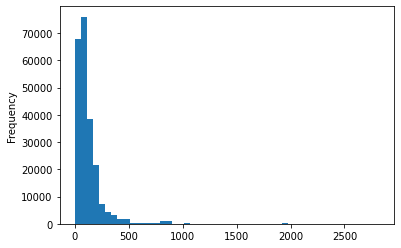

In [19]:
precios_por_hora["Precio"].plot.hist(bins=50)

## Manejo de fechas

In [20]:
precios_por_hora["Fecha"] = pd.to_datetime(precios_por_hora.Fecha)

In [21]:
precios_por_hora["Ano"] = precios_por_hora.Fecha.dt.year
precios_por_hora["Mes"] = precios_por_hora.Fecha.dt.month
precios_por_hora["Mes_nombre"] = precios_por_hora.Fecha.dt.month_name()
precios_por_hora["Dia"] = precios_por_hora.Fecha.dt.day
precios_por_hora["Dia_indice"] = precios_por_hora.Fecha.dt.dayofweek
precios_por_hora["Dia_nombre"] = precios_por_hora.Fecha.dt.day_name()
precios_por_hora["Trimestre"] = precios_por_hora.Fecha.dt.quarter
precios_por_hora.head()

,Fecha,Hora,Precio,Ano,Mes,Mes_nombre,Dia,Dia_indice,Dia_nombre,Trimestre
0,1995-07-21,0,1.073,1995,7,July,21,4,Friday,3
9413,1995-07-21,1,1.000,1995,7,July,21,4,Friday,3
94130,1995-07-21,10,6.000,1995,7,July,21,4,Friday,3
103543,1995-07-21,11,9.256,1995,7,July,21,4,Friday,3
112956,1995-07-21,12,9.256,1995,7,July,21,4,Friday,3


## Precio promedio diario

In [22]:
precio_promedio_por_dia = (
    precios_por_hora[["Fecha", "Precio"]].groupby(by="Fecha").mean()
)
precio_promedio_por_dia

,Precio
Fecha,
1995-07-21,4.924333
1995-07-22,1.269500
1995-07-23,0.953083
1995-07-24,4.305917
1995-07-25,1.149167
...,...
2021-04-26,188.325833
2021-04-27,181.770000
2021-04-28,175.874167


## Precio promedio mensual

In [23]:
precio_promedio_por_mes = (
    precios_por_hora[["Ano", "Mes", "Precio"]].groupby(by=["Ano", "Mes"]).mean()
)
precio_promedio_por_mes

Precio
Ano  Mes            
1995 7      1.552087
     8      7.086462
     9     10.955819
     10    10.445442
     11    27.534782
...              ...
2020 12   163.230121
2021 1    181.475605
     2    270.126384
     3    165.896895
     4    162.536000

[310 rows x 1 columns]